# Dataset Information

The two datasets are related to red and white variants of the Portuguese "Vinho Verde" wine. These datasets can be viewed as classification or regression tasks. The classes are ordered and not balanced (e.g. there are munch more normal wines than excellent or poor ones). Outlier detection algorithms could be used to detect the few excellent or poor wines. Also, we are not sure if all input variables are relevant. So it could be interesting to test feature selection methods. Two datasets were combined and few values were randomly removed.

### Attribute Information:

* Input variables (based on physicochemical tests): \
    1 - fixed acidity \
    2 - volatile acidity \
    3 - citric acid \
    4 - residual sugar \
    5 - chlorides \
    6 - free sulfur dioxide \
    7 - total sulfur dioxide \
    8 - density \
    9 - pH \
    10 - sulphates \
    11 - alcohol \

* Output variable (based on sensory data): \
    * quality (score between 0 and 10) 

# <p style="padding:10px ;background-color:#E6E6E6 ;margin:10;color:#000000;font-family:newtimeroman;font-size:100%;text-align:center;border-radius: 10px 10px ;overflow:hidden;font-weight:50">Wine Quality Predictions
</p>

# Read The Dataset

In [1]:
from warnings import filterwarnings
filterwarnings('ignore')

In [2]:
import pandas as pd
df = pd.read_csv('winequality.csv')

In [3]:
df.head()

,type,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,white,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6
1,white,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6
2,white,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6
3,white,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6
4,white,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6


In [4]:
df.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,6487.000000,6489.000000,6494.000000,6495.000000,6495.000000,6497.000000,6497.000000,6497.000000,6488.000000,6493.000000,6497.000000,6497.000000
mean,7.216579,0.339691,0.318722,5.444326,0.056042,30.525319,115.744574,0.994697,3.218395,0.531215,10.491801,5.818378
std,1.296750,0.164649,0.145265,4.758125,0.035036,17.749400,56.521855,0.002999,0.160748,0.148814,1.192712,0.873255
min,3.800000,0.080000,0.000000,0.600000,0.009000,1.000000,6.000000,0.987110,2.720000,0.220000,8.000000,3.000000
25%,6.400000,0.230000,0.250000,1.800000,0.038000,17.000000,77.000000,0.992340,3.110000,0.430000,9.500000,5.000000
50%,7.000000,0.290000,0.310000,3.000000,0.047000,29.000000,118.000000,0.994890,3.210000,0.510000,10.300000,6.000000
75%,7.700000,0.400000,0.390000,8.100000,0.065000,41.000000,156.000000,0.996990,3.320000,0.600000,11.300000,6.000000
max,15.900000,1.580000,1.660000,65.800000,0.611000,289.000000,440.000000,1.038980,4.010000,2.000000,14.900000,9.000000


In [5]:
df.shape

(6497, 13)

In [6]:
df.columns

Index(['type', 'fixed acidity', 'volatile acidity', 'citric acid',
       'residual sugar', 'chlorides', 'free sulfur dioxide',
       'total sulfur dioxide', 'density', 'pH', 'sulphates', 'alcohol',
       'quality'],
      dtype='object')

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6497 entries, 0 to 6496
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   type                  6497 non-null   object 
 1   fixed acidity         6487 non-null   float64
 2   volatile acidity      6489 non-null   float64
 3   citric acid           6494 non-null   float64
 4   residual sugar        6495 non-null   float64
 5   chlorides             6495 non-null   float64
 6   free sulfur dioxide   6497 non-null   float64
 7   total sulfur dioxide  6497 non-null   float64
 8   density               6497 non-null   float64
 9   pH                    6488 non-null   float64
 10  sulphates             6493 non-null   float64
 11  alcohol               6497 non-null   float64
 12  quality               6497 non-null   int64  
dtypes: float64(11), int64(1), object(1)
memory usage: 660.0+ KB


In [8]:
null = df.isnull().sum()
null[null>0]

fixed acidity       10
volatile acidity     8
citric acid          3
residual sugar       2
chlorides            2
pH                   9
sulphates            4
dtype: int64

# <p style="padding:10px ;background-color:#E6E6E6 ;margin:10;color:#000000;font-family:newtimeroman;font-size:100%;text-align:center;border-radius: 10px 10px ;overflow:hidden;font-weight:50">Exploratory Data Analysis
</p>

# Univariate Analysis

1. Con - Histogram
2. Cat - CountPlot

In [9]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [10]:
from Myfunction import catcondef
cat, con = catcondef(df)

In [11]:
cat

['type']

In [12]:
con

['fixed acidity',
 'volatile acidity',
 'citric acid',
 'residual sugar',
 'chlorides',
 'free sulfur dioxide',
 'total sulfur dioxide',
 'density',
 'pH',
 'sulphates',
 'alcohol',
 'quality']

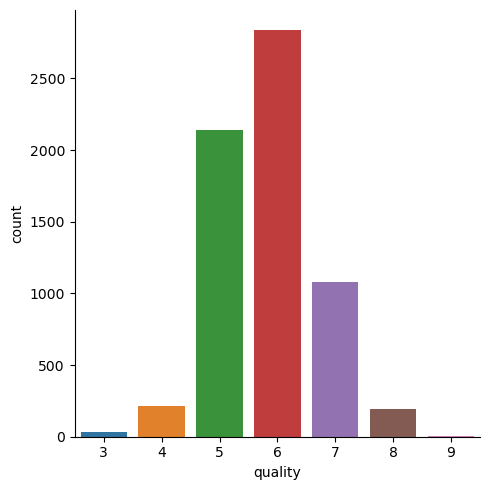

In [27]:
sns.catplot(x='quality',data=df,kind='count')

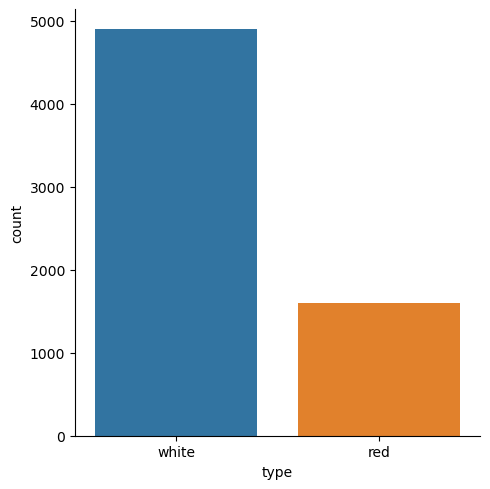

In [29]:
sns.catplot(x='type',data=df,kind='count')

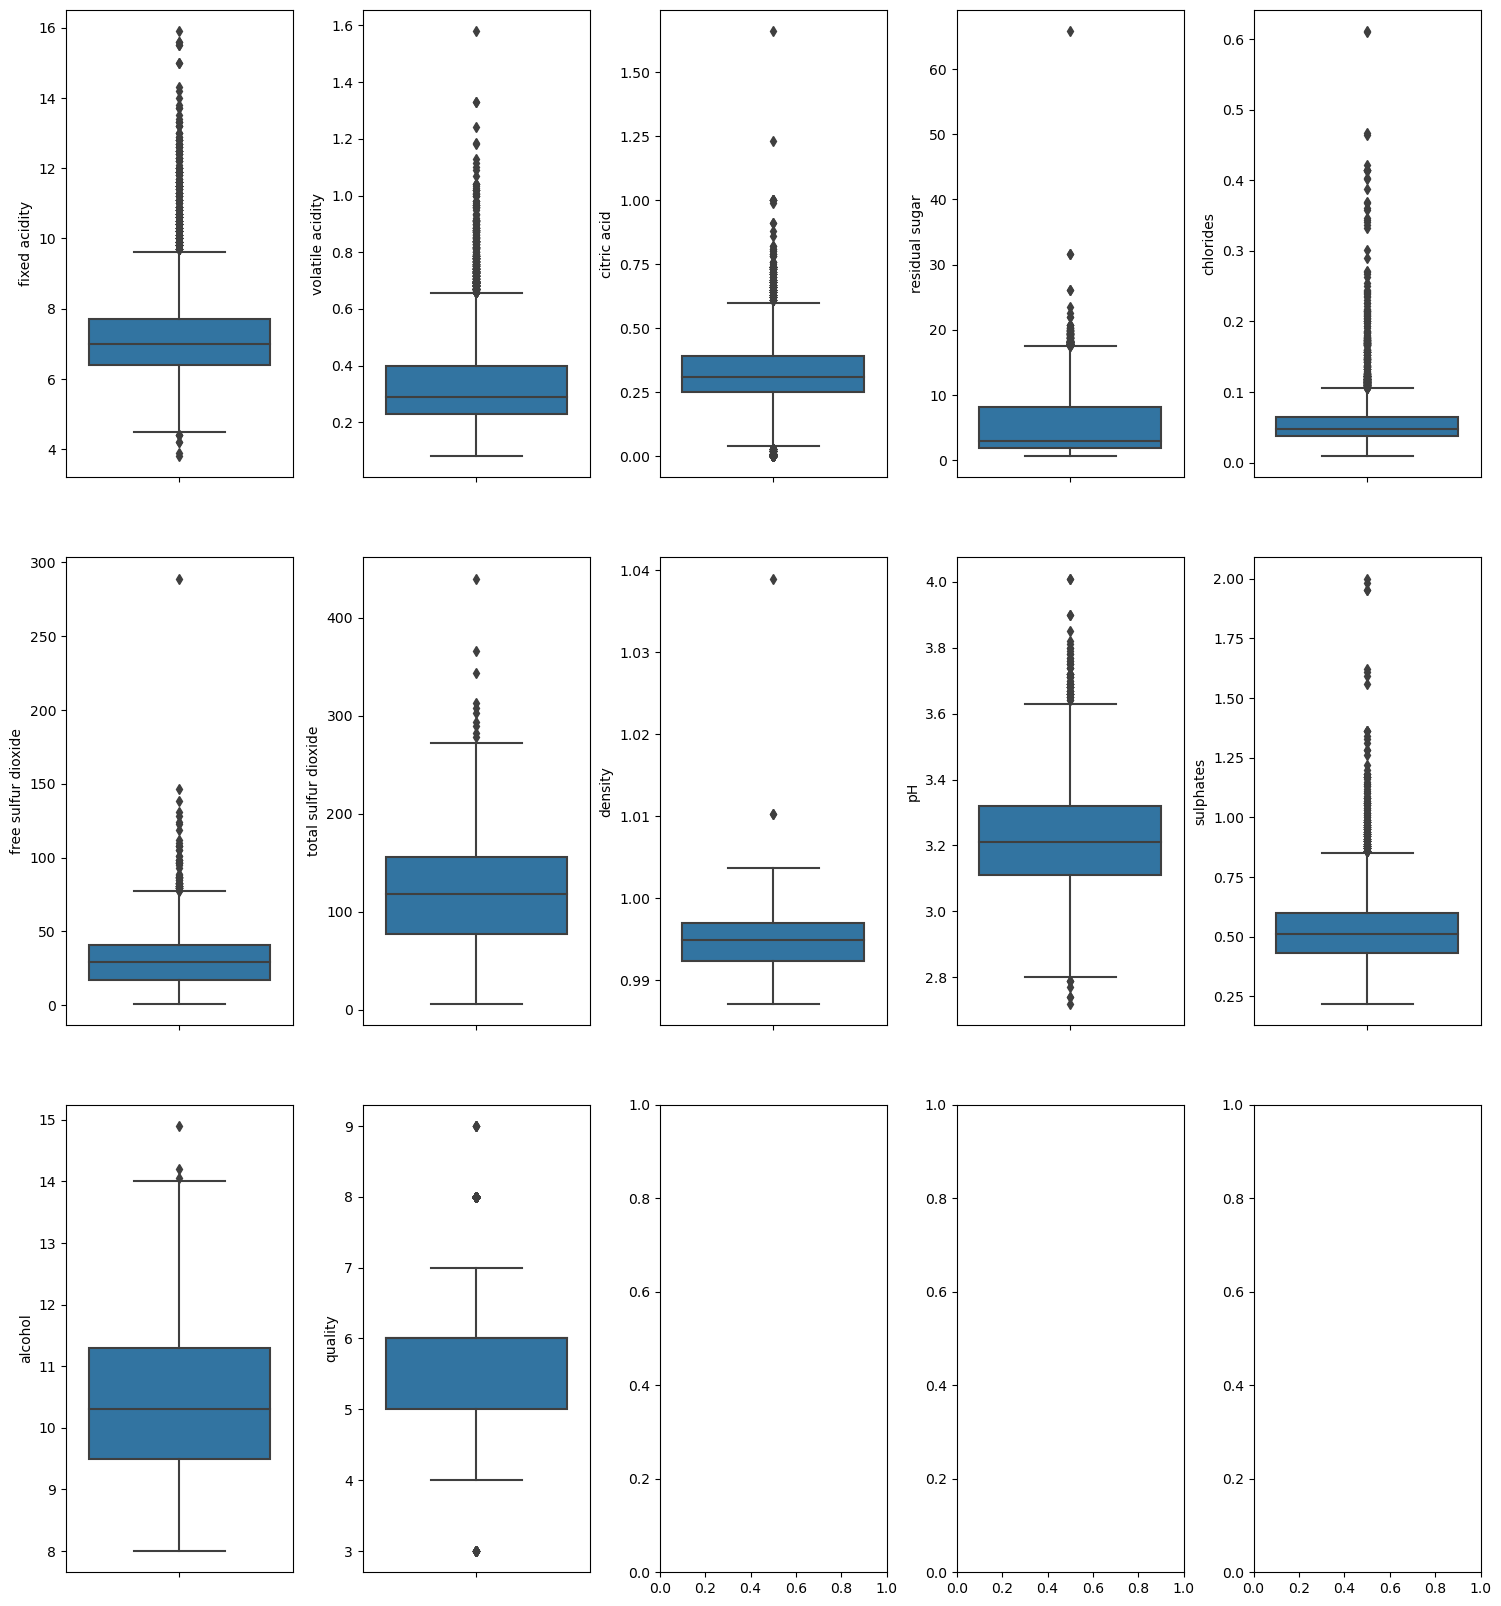

In [14]:
fig, ax = plt.subplots(ncols=5, nrows=3, figsize=(15,16))
x = 0
ax = ax.flatten()
for col, value in df.items():
    if col != 'type':
        sns.boxplot(y=col, data=df, ax=ax[x])
        x = x+1
plt.tight_layout(pad = 0.5, w_pad=0.7, h_pad=5.0)

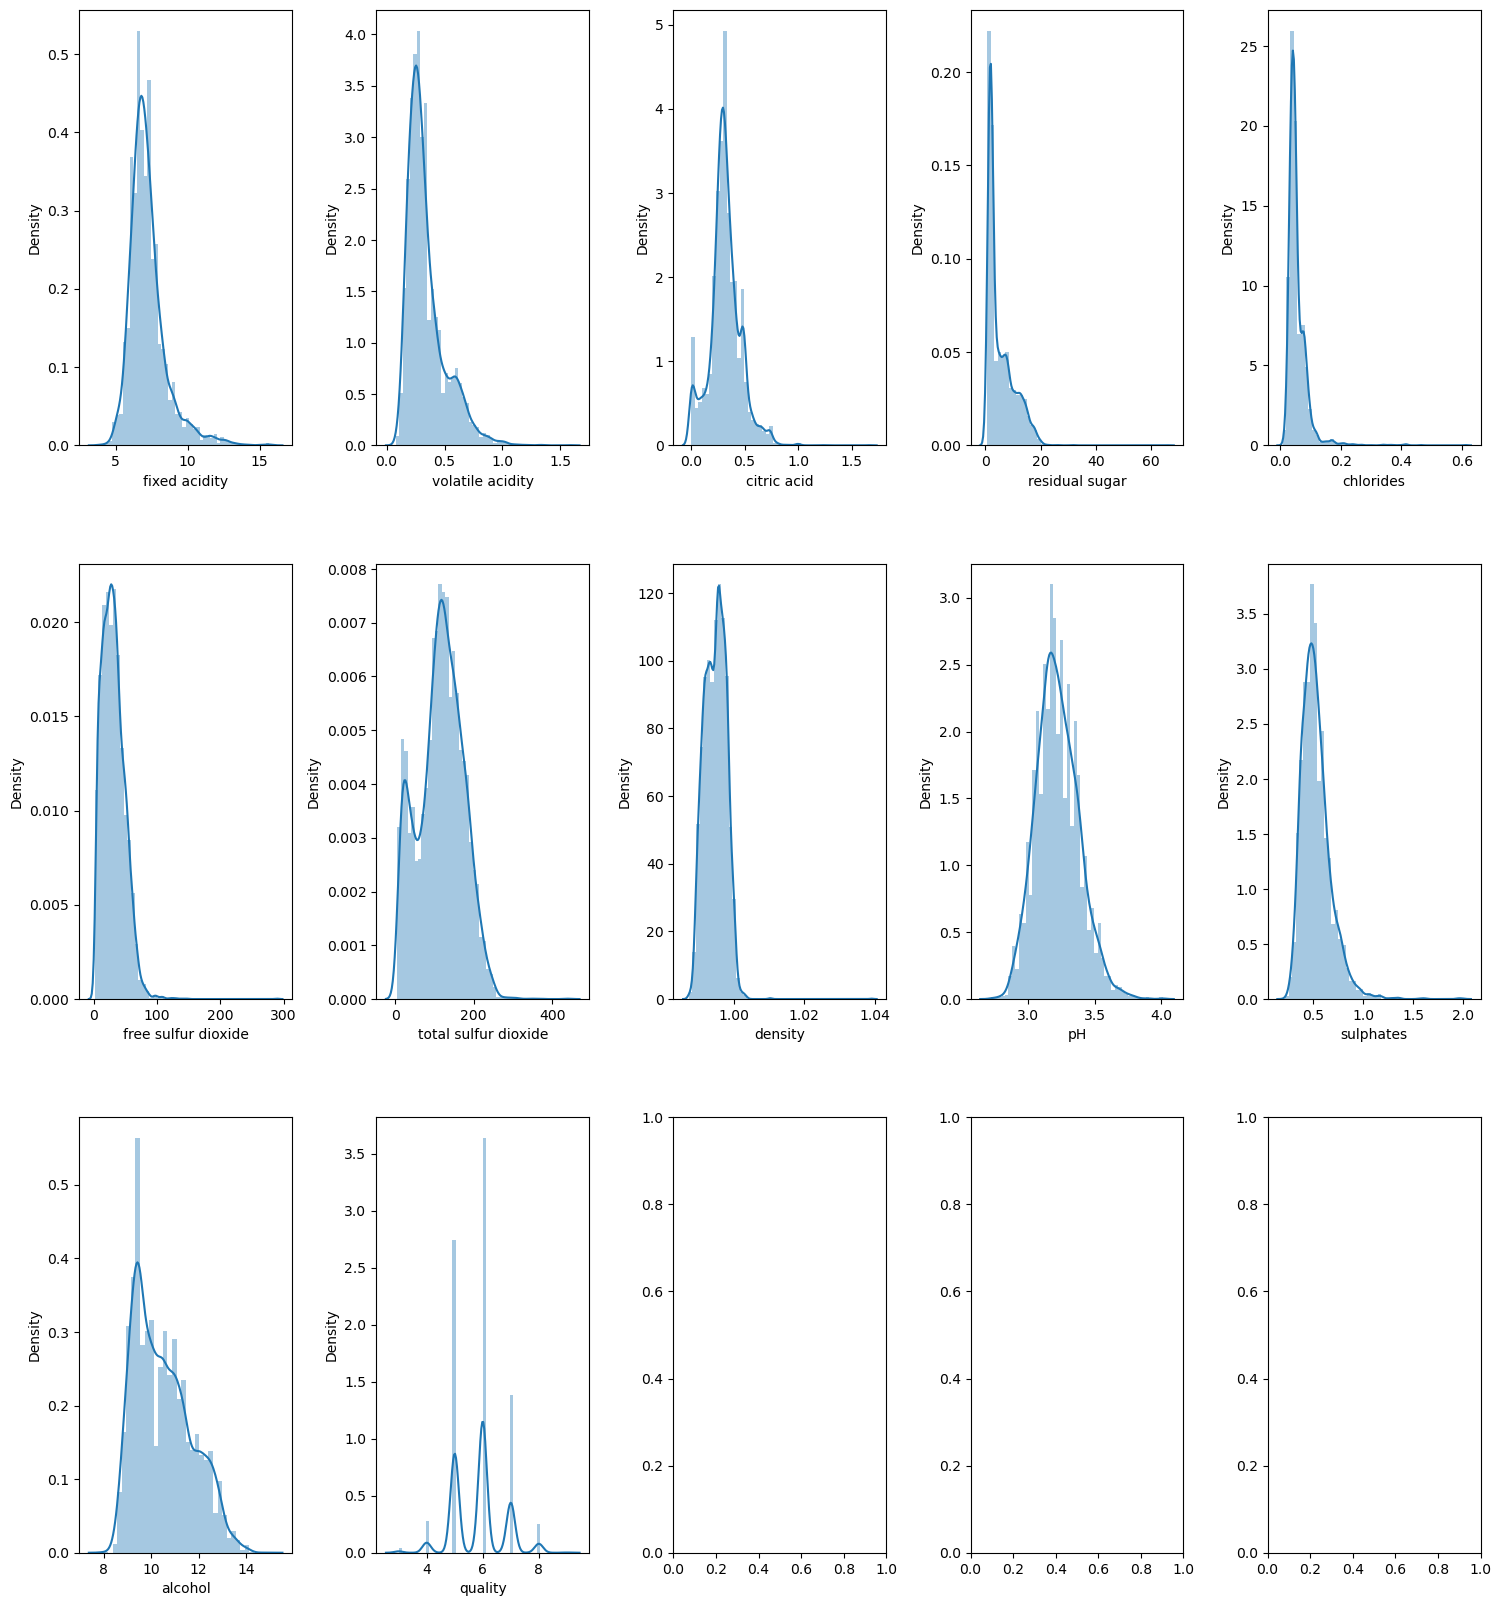

In [15]:
fig, ax = plt.subplots(ncols=5, nrows=3, figsize=(15,16))
x = 0
ax = ax.flatten()
for col, value in df.items():
    if col != 'type':
        sns.distplot(value, ax=ax[x])
        x = x+1
plt.tight_layout(pad = 0.5, w_pad=0.7, h_pad=5.0)

In [16]:
corr = df.corr()
corr

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
fixed acidity,1.000000,0.220172,0.323736,-0.112319,0.298421,-0.283317,-0.329747,0.459204,-0.251814,0.300380,-0.095603,-0.077031
volatile acidity,0.220172,1.000000,-0.378061,-0.196702,0.377167,-0.353230,-0.414928,0.271193,0.260660,0.225476,-0.038248,-0.265953
citric acid,0.323736,-0.378061,1.000000,0.142486,0.039315,0.133437,0.195218,0.096320,-0.328689,0.057613,-0.010433,0.085706
residual sugar,-0.112319,-0.196702,0.142486,1.000000,-0.128902,0.403439,0.495820,0.552498,-0.267050,-0.185745,-0.359706,-0.036825
chlorides,0.298421,0.377167,0.039315,-0.128902,1.000000,-0.195042,-0.279580,0.362594,0.044806,0.395332,-0.256861,-0.200886
free sulfur dioxide,-0.283317,-0.353230,0.133437,0.403439,-0.195042,1.000000,0.720934,0.025717,-0.145191,-0.188489,-0.179838,0.055463
total sulfur dioxide,-0.329747,-0.414928,0.195218,0.495820,-0.279580,0.720934,1.000000,0.032395,-0.237687,-0.275381,-0.265740,-0.041385
density,0.459204,0.271193,0.096320,0.552498,0.362594,0.025717,0.032395,1.000000,0.011920,0.259454,-0.686745,-0.305858
pH,-0.251814,0.260660,-0.328689,-0.267050,0.044806,-0.145191,-0.237687,0.011920,1.000000,0.191248,0.121002,0.019366
sulphates,0.300380,0.225476,0.057613,-0.185745,0.395332,-0.188489,-0.275381,0.259454,0.191248,1.000000,-0.003261,0.038729


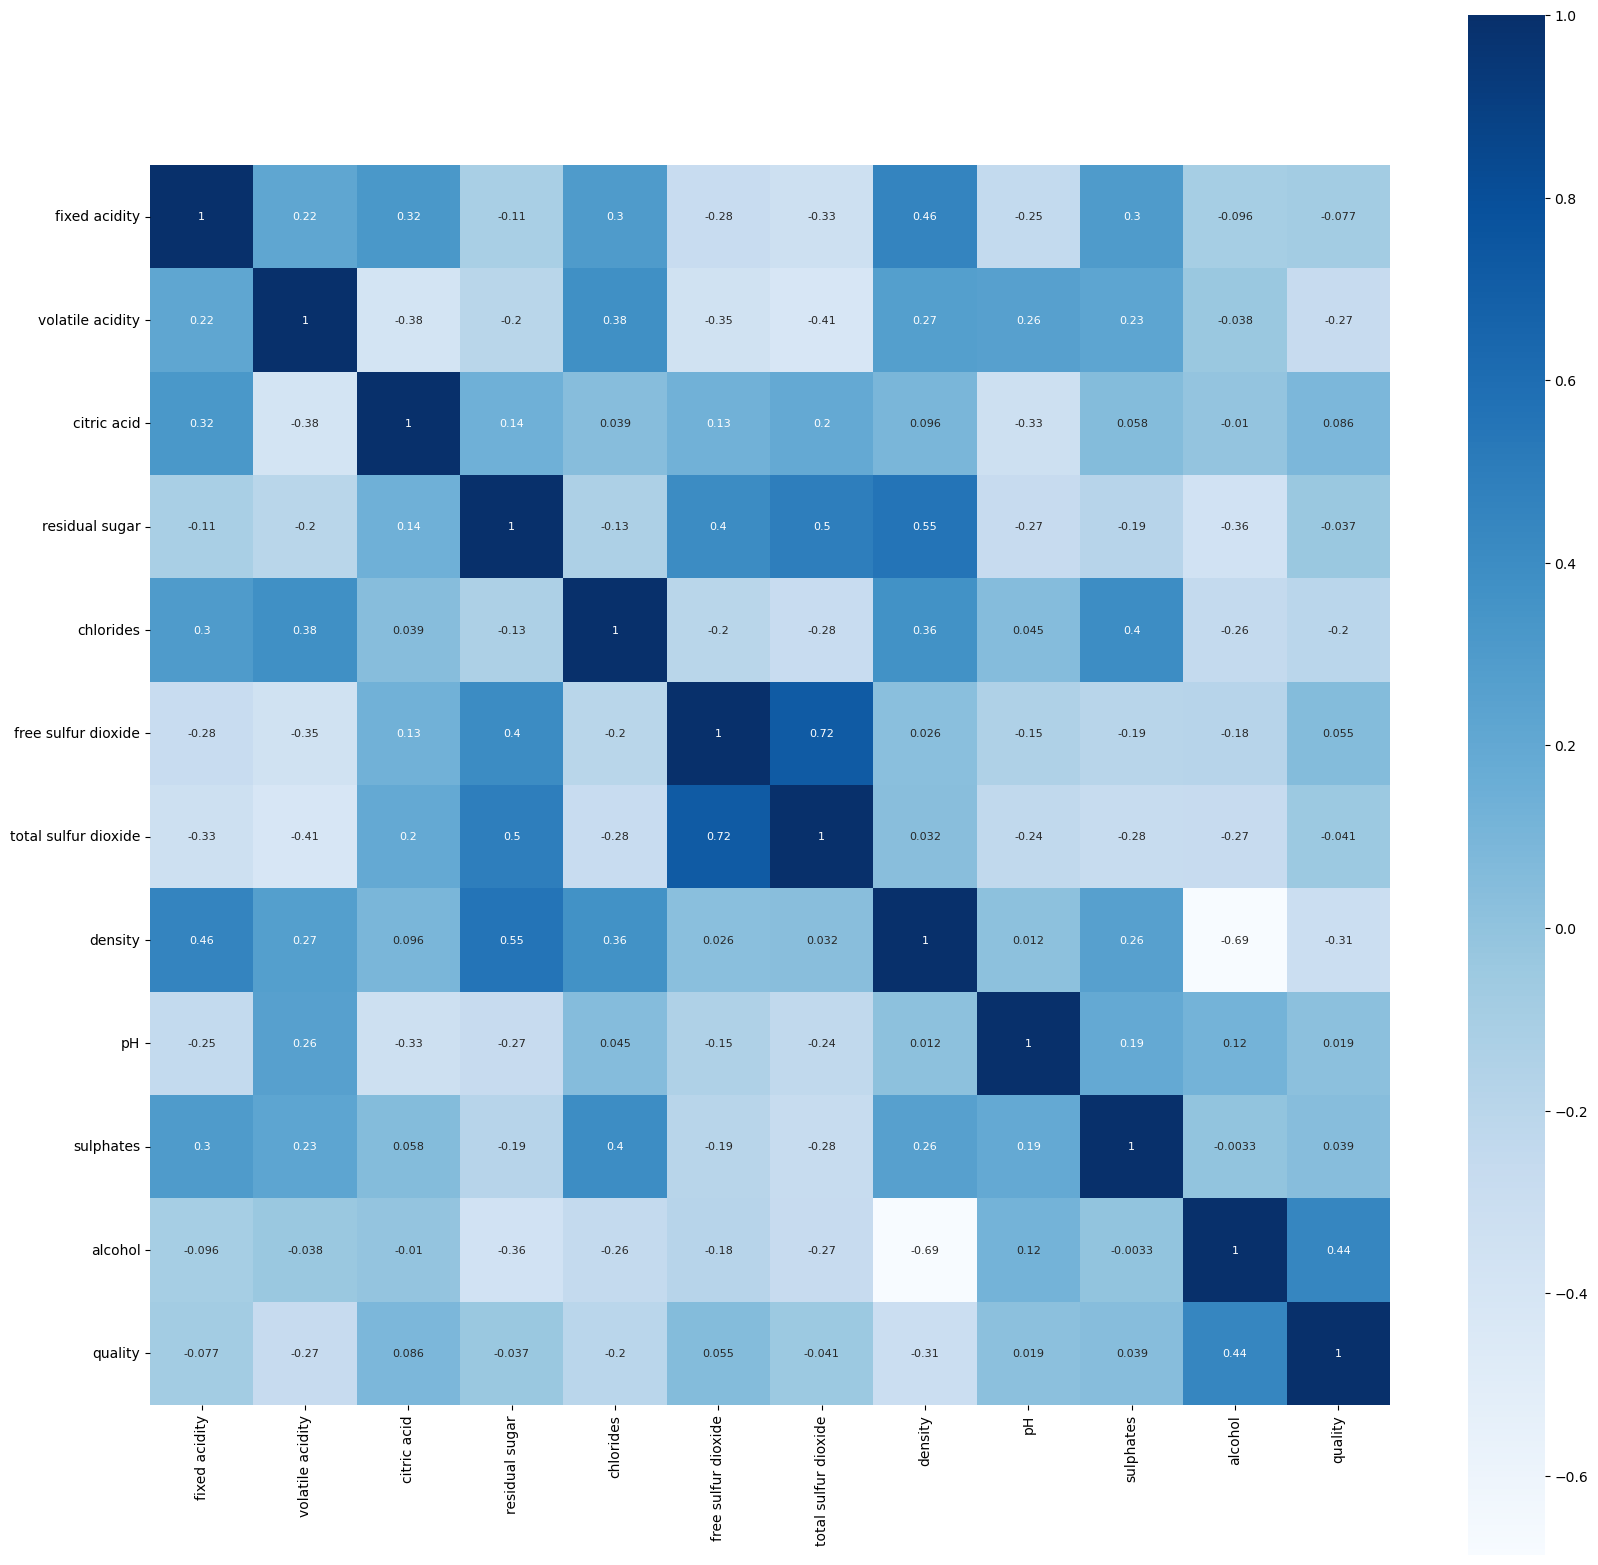

In [17]:
plt.figure(figsize=(20,20))
sns.heatmap(corr, cbar=True, annot=True, cmap='Blues',square=True, annot_kws={'size':8})
plt.show()

# <p style="padding:10px;background-color:#E6E6E6 ;margin:10;color:#000000;font-family:newtimeroman;font-size:100%;text-align:center;border-radius: 10px 10px ;overflow:hidden;font-weight:50">Data Preprocessing with Sklearn pipelines</p>

# Seperate X and Y value


In [62]:
X = df.drop(labels=['quality'],axis=1)
Y = df['quality'].apply(lambda y_value:1 if y_value>=7 else 0)

In [63]:
X.head()

,type,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
0,white,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8
1,white,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5
2,white,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1
3,white,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9
4,white,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9


In [64]:
Y.head()

0    0
1    0
2    0
3    0
4    0
Name: quality, dtype: int64

# Apply Lable encoding in Type column

In [65]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
X['type'] = le.fit_transform(X['type'])

In [66]:
X['type'].value_counts()

1    4898
0    1599
Name: type, dtype: int64

# <p style="padding:10px;background-color:#E6E6E6 ;margin:10;color:#000000;font-family:newtimeroman;font-size:100%;text-align:center;border-radius: 10px 10px ;overflow:hidden;font-weight:50">Apply Preprocessing Pipeline on X Fratures</p>


In [67]:
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler

In [68]:
num_pipe = Pipeline(steps=[('imputer',SimpleImputer(strategy='mean')),
                          ('scaler',StandardScaler())])

In [69]:
X_pre = num_pipe.fit_transform(X)

In [70]:
X_pre

array([[ 0.57136659, -0.1671586 , -0.4235636 , ..., -1.35966451,
        -0.5459591 , -1.41855821],
       [ 0.57136659, -0.70742728, -0.24123152, ...,  0.50804501,
        -0.27706392, -0.83161516],
       [ 0.57136659,  0.68183504, -0.36278624, ...,  0.25901707,
        -0.6131829 , -0.32852111],
       ...,
       [-1.75018984, -0.70742728,  1.03509307, ...,  1.25512882,
         1.47075478,  0.42611996],
       [-1.75018984, -1.01615224,  1.85558744, ...,  2.18898358,
         1.2018596 , -0.2446721 ],
       [-1.75018984, -0.938971  , -0.18045416, ...,  1.06835787,
         0.86574062,  0.42611996]])

In [71]:
cols = num_pipe.get_feature_names_out()

In [72]:
cols

array(['type', 'fixed acidity', 'volatile acidity', 'citric acid',
       'residual sugar', 'chlorides', 'free sulfur dioxide',
       'total sulfur dioxide', 'density', 'pH', 'sulphates', 'alcohol'],
      dtype=object)

In [73]:
X_pre = pd.DataFrame(X_pre,columns=cols)

In [74]:
X_pre

,type,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
0,0.571367,-0.167159,-0.423564,0.284245,3.206977,-0.315222,0.815565,0.959976,2.102214,-1.359665,-0.545959,-1.418558
1,0.571367,-0.707427,-0.241232,0.146523,-0.808136,-0.201027,-0.931107,0.287618,-0.232332,0.508045,-0.277064,-0.831615
2,0.571367,0.681835,-0.362786,0.559689,0.306005,-0.172479,-0.029599,-0.331660,0.134525,0.259017,-0.613183,-0.328521
3,0.571367,-0.012796,-0.666673,0.008801,0.642350,0.055911,0.928254,1.243074,0.301278,-0.176782,-0.882078,-0.496219
4,0.571367,-0.012796,-0.666673,0.008801,0.642350,0.055911,0.928254,1.243074,0.301278,-0.176782,-0.882078,-0.496219
...,...,...,...,...,...,...,...,...,...,...,...,...
6492,-1.750190,-0.784609,1.582089,-1.643863,-0.724050,0.969467,0.083090,-1.269422,0.067824,1.441900,0.327950,0.006875
6493,-1.750190,-1.016152,1.278203,-1.506141,-0.682007,0.170105,0.477500,-1.145567,0.141195,1.877699,0.000000,0.593818
6494,-1.750190,-0.707427,1.035093,-1.299558,-0.660986,0.569786,-0.085943,-1.340197,0.347969,1.255129,1.470755,0.426120
6495,-1.750190,-1.016152,1.855587,-1.368419,-0.724050,0.541237,0.083090,-1.269422,0.257923,2.188984,1.201860,-0.244672


# Seperate Train Test Split

In [75]:
from sklearn.model_selection import train_test_split
xtrain, xtest, ytrain, ytest = train_test_split(X_pre,Y,test_size=0.2,random_state=21)

In [76]:
xtrain.shape

(5197, 12)

In [77]:
xtest.shape

(1300, 12)

# Create a Random Forest Classifier

In [100]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
model = RandomForestClassifier()
model.fit(xtrain,ytrain)

RandomForestClassifier()

# Predict Traning and Testing data

In [101]:
ypred_tr = model.predict(xtrain)
ypred_ts = model.predict(xtest)

In [102]:
ypred_tr[0:5]

array([1, 0, 0, 1, 0], dtype=int64)

In [103]:
ytrain.head()

651     1
3622    0
3998    0
2985    1
5140    0
Name: quality, dtype: int64

# Evaluate Model

In [104]:
model.score(xtrain,ytrain)

0.9998075812969021

In [105]:
model.score(xtest,ytest)

0.8907692307692308

In [106]:
tr_acc = accuracy_score(ytrain,ypred_tr)
tr_acc

0.9998075812969021

In [107]:
ts_acc = accuracy_score(ytest,ypred_ts)
ts_acc

0.8907692307692308

# View The Confusion Metrix for test Data

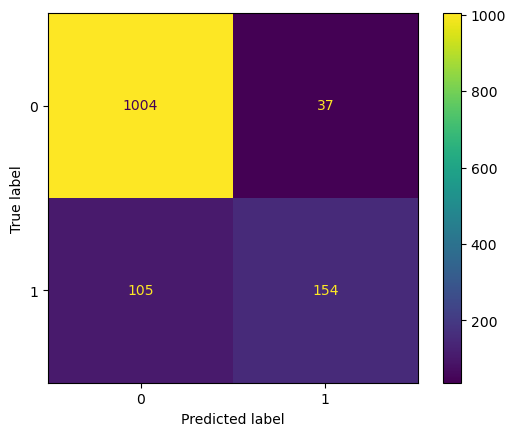

In [109]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
cf = confusion_matrix(ytest,ypred_ts)
cfd = ConfusionMatrixDisplay(cf,display_labels=model.classes_)
cfd.plot()
plt.show()